# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





In [24]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt

#Symbolically integrating and displaying the integral
x = Symbol('x')
f = 3*x**2 + 2*x + 2
integrate(f, x)

In [38]:
#Computing the exact integral symbolically
exact = integrate(f, (x, -4, 6))
print(exact)

320


For N= 10 , the Integral= 325.0
For N= 20 , the Integral= 321.25
For N= 40 , the Integral= 320.3125
For N= 80 , the Integral= 320.078125
For N= 160 , the Integral= 320.01953125
For N= 320 , the Integral= 320.0048828125
For N= 640 , the Integral= 320.001220703125
For N= 1280 , the Integral= 320.00030517578125


Text(0, 0.5, 'Abs Error')

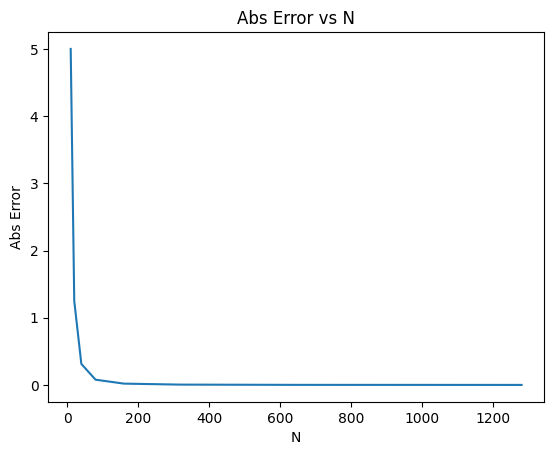

In [43]:
#Trapezoid Rule Function
def trap_Rule(N, a, b): 
    """Computes definite integral of f using trapezoid rule.

    Args:
        N: number of equally spaced panels
        a: lower limit
        b: upper limit

    Returns:
        float: integration
    """
    dx = (b - a) / N #computes dx

    #computes the summation
    sum = 0
    for k in range(1,N):
        sum += 3*(a + (k * dx))**2 + 2*(a + (k * dx)) + 2

    #computes f(a) and f(b)
    f_a = 3*(a)**2 + 2*(a) + 2
    f_b = 3*(b)**2 + 2*(b) + 2

    #returns final computation of integral
    return dx * (sum + (f_a + f_b) / 2)

N = [10, 20, 40, 80, 160, 320, 640, 1280] #step values to test
a = -4 #lower limit
b = 6 #upper limit
#Computes the intgeral for the various step sizes
approx = []
for i in range(0,len(N)):
    approx.append(trap_Rule(N[i], a, b))
    print('For N=', N[i], ', the Integral=', approx[i])

#computes error
error = [abs(x - exact) for x in approx]

plt.plot(N, error)
plt.title("Abs Error vs N")
plt.xlabel("N")
plt.ylabel("Abs Error")


## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [302]:
import pandas as pd

#creating random data
hemp = np.random.randint(low=1000, high=10000+1, size=3)
baby = np.random.randint(low=1000, high=10000+1, size=3)
islip = np.random.randint(low=1000, high=10000+1, size=3)
brook = np.random.randint(low=1000, high=10000+1, size=3)

#putting data in dataframe with 'population in x' as index defintions instead of 0,1,...
pop = pd.DataFrame({'Hempstead': hemp, 'Babylon': baby, 'Islip': islip, 'Brookhaven': brook}, index = ['Population in 2099', 'Population in 2300', 'Population in 2400'])
pop

,Hempstead,Babylon,Islip,Brookhaven
Population in 2099,9140,3913,9642,8334
Population in 2300,5420,7978,1862,3682
Population in 2400,6877,7245,8978,2486


In [303]:
#display the population of hempstead in 2300
pop['Hempstead']['Population in 2300']

5420

In [304]:
#adds riverhead column equal to sum of Islip and Brookhaven in each row
pop['Riverhead'] = pop['Islip'] + pop['Brookhaven']
pop

,Hempstead,Babylon,Islip,Brookhaven,Riverhead
Population in 2099,9140,3913,9642,8334,17976
Population in 2300,5420,7978,1862,3682,5544
Population in 2400,6877,7245,8978,2486,11464


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [305]:
#Importing data and checking column names 
cus = pd.read_csv('customers-100.csv')
cus.columns.tolist()

['Index',
 'Customer Id',
 'First Name',
 'Last Name',
 'Company',
 'City',
 'Country',
 'Phone 1',
 'Phone 2',
 'Email',
 'Subscription Date',
 'Website']

In [94]:
#Sorting the data alphabetically by last name and displaying the first few rows
cus.sort_values('Last Name').head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
67,68,a014Ec1b9FccC1E,Tom,Alvarado,Donaldson-Dougherty,South Sophiaberg,Kiribati,(585)606-2980x2258,730-797-3594x5614,nicholsonnina@montgomery.info,2020-08-18,http://odom-massey.com/
96,97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
92,93,aAb6AFc7AfD0fF3,Collin,Ayers,Lamb-Peterson,South Lonnie,Anguilla,404-645-5351x012,001-257-582-8850x8516,dudleyemily@gonzales.biz,2021-06-29,http://www.ruiz.com/
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
15,16,8cad0b4CBceaeec,Miranda,Beasley,Singleton and Sons,Desireeshire,Oman,540.085.3135x185,+1-600-462-6432x21881,vduncan@parks-hardy.com,2022-04-12,http://acosta.org/


In [307]:
#filtering by subscription date range and taking total as length of resulting table
filt = cus[(cus['Subscription Date'] >= '2021-01-01') & (cus['Subscription Date'] <= '2021-12-31')]
len(filt)

43

## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


Fact: LU and PLU decompositions are not unique.

My LU Decompostion Code works by intializing U as A, and L as an indenity matrix. Then a triple for loop iterates through the rows (excluding the last), the rows under the pivot row, and the columns. U is then upper triangularized with the equation seen below while the pivoting factor is stored in L. 

In [311]:
import numpy as np
import copy
import random

#LU Decompostion Algorithm, No Pivoting
def LUdecomposition(A):
    (m,n) = A.shape
    #Checks matrix is square
    if m != n:
        raise Exception("Matrix Not Square (Prompt Specifies nxn Matrix)")
    U = copy.copy(A) #U initalized as shallow copy of U
    L = np.identity(n) #L initialized as idenitity matrix
    #Upper triangularizes U and Stores multiples in L
    for i in range(0,n-1):
        if U[i,i] == 0:
            raise Exception("Pivot = 0, Permutation Needed")
        for j in range(i+1,n):
            c = U[j][i]/U[i][i]
            L[j][i] = c
            for k in range(i,n):
                U[j][k] = U[j][k] - c * U[i][k]
    return (L, U)

#Example matrix as a visual that the code is working
A = np.random.randint(1, 10, size=(3,3))
print('Example Matrix A: \n',A,'\n')
(L,U) = LUdecomposition(A)
print('U: \n',U,'\n')
print('L: \n',L,'\n')
a = np.matmul(L,U)
print('LU: \n',a,'\n')


Example Matrix A: 
 [[1 9 4]
 [3 9 7]
 [9 1 5]] 

U: 
 [[  1   9   4]
 [  0 -18  -5]
 [  0   0  -8]] 

L: 
 [[1.         0.         0.        ]
 [3.         1.         0.        ]
 [9.         4.44444444 1.        ]] 

LU: 
 [[1.         9.         4.        ]
 [3.         9.         7.        ]
 [9.         1.         5.77777778]] 



Below is an experiment that can be run to test the accuracy of the algorithm. The code will run the algoirthm N number of times for a nxn random matrix and find the mean difference between what the elements of LU equal and what A was. Since this algorithm uses no pivoting strategy sometimes one of the matricies will not have a pure LU, and an error will be raised. Since the probability of this isn't too large just run it until no error occurs

In [318]:
#Experiment: The following finds the LU decomp of N random matricies of size n and caculates an average difference between the elemnts of A and LU
N = 10
n = 5
sum = 0
print('User Notice: If experiment ran and exception is raised, run again until none of the random matricies need permuting','\n')
for i in range(N):
    A = np.random.randint(1, 100, size=(n,n))
    (L, U) = LUdecomposition(A)
    a = np.matmul(L,U)
    sum = sum + np.mean(abs(A-a))
ave_diff = sum/N
#Display corresponding message based on result
if ave_diff <= 0.5:
    print('For ', N, ' random matricies with size ', n, ' the average difference in A vs LU is ', ave_diff, '\n')
else:
    print('The algorithm is a poor factorization of a Matrix')

User Notice: If experiment ran and exception is raised, run again until none of the random matricies need permuting 

For  10  random matricies with size  5  the average difference in A vs LU is  0.4656857893139268 



The below code utilizes a partial pivoting strategy to find a permutation matrix. It works by going through each pivot row and column of A, finding the largest column element under said row (inclusive) to the pivot row, and moving the corresponding row of an indentity matrix to that position.

In [316]:
#Function that returns the partial pivoting matrix of A
def pivoting(A):
    n = len(A)
    B = copy.copy(A)
    P = np.identity(n) #initalizes P as idenity matrix
    for i in range(n-1):
        max_index = i + np.argmax(np.abs(B[i:,i])) #checks for largest column element from the current diagonal row down
        max_row = P[max_index] 
        P[[i,max_index]] = P[[max_index,i]] #swaps row with largest column element with current row
        B[[i,max_index]] = B[[max_index,i]] #does same swap for shallow copy of A
    return P

A = np.array([[4, 3, 4], [7, 5, 7], [6, 2, 2]])
#LUdecomposition(A)
print('Example of Matrix w/o Pure LU: \n', A, '\n')
P = pivoting(A)
print('Partial Pivoting Matrix: \n', P, '\n')
B = np.matmul(P,A)
(L,U) = LUdecomposition(B)
print('L: \n', L, '\n U: \n', U)
print('\nP^TLU: \n', np.matmul(P.T,np.matmul(L,U)))


Example of Matrix w/o Pure LU: 
 [[4 3 4]
 [7 5 7]
 [6 2 2]] 

Partial Pivoting Matrix: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

L: 
 [[  1.           0.           0.        ]
 [  0.57142857   1.           0.        ]
 [  0.85714286 -16.           1.        ]] 
 U: 
 [[ 7.          5.          7.        ]
 [ 0.          0.14285714  0.        ]
 [ 0.          0.         -4.        ]]

P^TLU: 
 [[4. 3. 4.]
 [7. 5. 7.]
 [6. 2. 2.]]


## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [263]:
np.random.seed(7)

#Creates and normalizes a random markov matrix
rand_M = np.random.randint(10+1, size=(5,5))
#print(rand_M, '\n')
P = rand_M / np.sum(rand_M, axis=1)[:,None]
print('Markov Matrix P:\n',P, '\n')

#Creates and normalizes a random initial probability dist
rand_v = np.random.randint(10+1, size=(5,1))
#print(rand_v, '\n')
p = rand_v / np.sum(rand_v, axis=0)[None, :]
print('Intial Dist p0:\n',p.T, '\n')

#Performes P.T*p 50 times to find Probability Dist at p50
for i in range(1,51):
    p = (P.T).dot(p)
p = p / np.sum(p)
print('Prob Dist @ p50:\n', p.T, '\n')

#Computes eigenvalues and vectors of P.T
ew, ev = np.linalg.eig(P.T)
#print(ev, '\n')
#print(ew, '\n')
index = np.argmin([abs(x - 1) for x in ew]) #finds index of eigenvalue closest to 1
#print(ev[:,index],'\n')
v = np.real(ev[:,index] /np.sum(ev[:,index])).reshape((5,1)) #takes corresponding eigenvector and normalizes it
print('Stationary Dist:\n', v.T,'\n')
#print(np.sum(v),'\n')

error = abs(v - p[0])
print('Abs Diff:\n',error.T)


Markov Matrix P:
 [[0.16       0.36       0.24       0.12       0.12      ]
 [0.18421053 0.18421053 0.23684211 0.18421053 0.21052632]
 [0.20454545 0.22727273 0.22727273 0.18181818 0.15909091]
 [0.35294118 0.23529412 0.         0.41176471 0.        ]
 [0.22580645 0.32258065 0.19354839 0.09677419 0.16129032]] 

Intial Dist p0:
 [[0.28571429 0.28571429 0.25       0.17857143 0.        ]] 

Prob Dist @ p50:
 [[0.22249907 0.2597914  0.18167084 0.20453313 0.13150557]] 

Stationary Dist:
 [[0.22249907 0.2597914  0.18167084 0.20453313 0.13150557]] 

Abs Diff:
 [[5.55111512e-17 3.72923217e-02 4.08282381e-02 1.79659455e-02
  9.09935055e-02]]
